# Exploration of feature selection and model selection with Sneaker Resell Data

This notebook is about the methods of feature selection currently in use for linear regression. These methods are Lasso, Ridge, and ElasticNet regression. I am curious to see what model is the best for predicting how much a shoe would sale for. We are going to use data provided by StockX.

Here's a summary of the dataset that StockX provides:

> "The data in this sheet consist of a random sample of all U.S. Off-White x Nike and Yeezy 350 sales from between 9/1/2017 and 2/13/2019. To create this sample, we took a random, fixed percentage of StockX sales (X%) for each colorway, on each day, since September, 2017. So, for each day the Off-White Jordan 1 was on the market, we randomly selected X% of its sale from each day. (It’s not important to know what X is; all that matters is that it’s a random sample, and that the same fixed X% of sales was selected from every day, for every sneaker). The sample was limited to U.S. sales only. We’ve included 8 variables for you to work with: Order Date, Brand, Sneaker Name, Sale Price (\\$), Retail Price ($), Release Date, Shoe Size, and Buyer Region (the state the buyer shipped to). You can use whatever variables you want in the analysis; you can use 1 variable, or you can use all 8. "

We're going to start with loading the data in and verifying the data type of each column.

In [2]:
# load data
import pandas as pd

stockx_data = pd.read_csv('StockX-Data-Contest-2019-3.csv')
stockx_data.head()

,Order Date,Brand,Sneaker Name,Sale Price,Retail Price,Release Date,Shoe Size,Buyer Region
0,9/1/2017,Yeezy,Adidas-Yeezy-Boost-350-Low-V2-Beluga,"$1,097",$220,9/24/2016,11.0,California
1,9/1/2017,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Copper,$685,$220,11/23/2016,11.0,California
2,9/1/2017,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Green,$690,$220,11/23/2016,11.0,California
3,9/1/2017,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Red,"$1,075",$220,11/23/2016,11.5,Kentucky
4,9/1/2017,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Red-2017,$828,$220,2/11/2017,11.0,Rhode Island


In [3]:
stockx_data.dtypes

Order Date       object
Brand            object
Sneaker Name     object
Sale Price       object
Retail Price     object
Release Date     object
Shoe Size       float64
Buyer Region     object
dtype: object

Now let's check if there's any nulls... Fun fact - isnull() is the same as isna() in pandas. In R, na and null are different things and pandas was obviously inspired by R. However, pandas is built in top of numpy, which is only has NaN values. 
https://datascience.stackexchange.com/questions/37878/difference-between-isna-and-isnull-in-pandas

In [4]:
# check for nulls
print(stockx_data.isnull().any())

Order Date      False
Brand           False
Sneaker Name    False
Sale Price      False
Retail Price    False
Release Date    False
Shoe Size       False
Buyer Region    False
dtype: bool


Now I'm going to clean some of the columns and change them into the data types we need. For "Sale Price" and "Retail Price" we need to remove the "$" and the "," from the string then convert the datatype to a float. We are also converting "Shoe Size" to a float and removing the dashes from the sneaker name so that we can type in a simpler string when we predict.

In [5]:
# transform data types and strip dollar signs/commas
stockx_data['Sale Price'] = stockx_data['Sale Price'].astype('string').str.strip('$').str.replace(',','').astype('float').round(2)
stockx_data['Retail Price'] = stockx_data['Retail Price'].astype('string').str.strip('$').str.replace(',','').astype('float').round(2)
stockx_data['Shoe Size'] = stockx_data['Shoe Size'].astype('float')

In [6]:
stockx_data.head()

,Order Date,Brand,Sneaker Name,Sale Price,Retail Price,Release Date,Shoe Size,Buyer Region
0,9/1/2017,Yeezy,Adidas-Yeezy-Boost-350-Low-V2-Beluga,1097.0,220.0,9/24/2016,11.0,California
1,9/1/2017,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Copper,685.0,220.0,11/23/2016,11.0,California
2,9/1/2017,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Green,690.0,220.0,11/23/2016,11.0,California
3,9/1/2017,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Red,1075.0,220.0,11/23/2016,11.5,Kentucky
4,9/1/2017,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Red-2017,828.0,220.0,2/11/2017,11.0,Rhode Island


In [7]:
stockx_data.dtypes

Order Date       object
Brand            object
Sneaker Name     object
Sale Price      float64
Retail Price    float64
Release Date     object
Shoe Size       float64
Buyer Region     object
dtype: object

In [30]:
stockx_data.describe()

,sale_price,retail_price
count,99956.000000,99956.00000
mean,446.634719,208.61359
std,255.982969,25.20001
min,186.000000,130.00000
25%,275.000000,220.00000
50%,370.000000,220.00000
75%,540.000000,220.00000
max,4050.000000,250.00000


In [8]:
stockx_data.head()

,Order Date,Brand,Sneaker Name,Sale Price,Retail Price,Release Date,Shoe Size,Buyer Region
0,9/1/2017,Yeezy,Adidas-Yeezy-Boost-350-Low-V2-Beluga,1097.0,220.0,9/24/2016,11.0,California
1,9/1/2017,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Copper,685.0,220.0,11/23/2016,11.0,California
2,9/1/2017,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Green,690.0,220.0,11/23/2016,11.0,California
3,9/1/2017,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Red,1075.0,220.0,11/23/2016,11.5,Kentucky
4,9/1/2017,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Red-2017,828.0,220.0,2/11/2017,11.0,Rhode Island


In [9]:
stockx_data.columns=['order_date','brand','sneaker_name', 'sale_price', 'retail_price','release_date','shoe_size', 'buyer_region']
stockx_data.head()

,order_date,brand,sneaker_name,sale_price,retail_price,release_date,shoe_size,buyer_region
0,9/1/2017,Yeezy,Adidas-Yeezy-Boost-350-Low-V2-Beluga,1097.0,220.0,9/24/2016,11.0,California
1,9/1/2017,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Copper,685.0,220.0,11/23/2016,11.0,California
2,9/1/2017,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Green,690.0,220.0,11/23/2016,11.0,California
3,9/1/2017,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Red,1075.0,220.0,11/23/2016,11.5,Kentucky
4,9/1/2017,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Red-2017,828.0,220.0,2/11/2017,11.0,Rhode Island


In [10]:
stockx_data['brand'] = stockx_data['brand'].astype('category')
stockx_data['sneaker_name'] = stockx_data['sneaker_name'].astype('category')
stockx_data['shoe_size'] = stockx_data['shoe_size'].astype('category')
stockx_data['buyer_region'] = stockx_data['buyer_region'].astype('category')

Let's split the data into training and test subsets. We are going to use the training data for cross-validation to test out different regression regularization techniques (ridge, lasso, elastic) then get our error from the test dataset.

To make our analysis easier, I'm going to avoid using time series data. Just going to drop the date columns. Also going to drop any other column other than brand, sale price, shoe size, and buyer region.

In [11]:
stockx_data.drop(columns=['order_date', 'release_date'], axis=1,inplace=True)

# create dataset for generic ols model
ols_data = stockx_data.copy()
ols_data.drop(columns=['sneaker_name','retail_price'], axis=1,inplace=True)
ols_data.head()

,brand,sale_price,shoe_size,buyer_region
0,Yeezy,1097.0,11.0,California
1,Yeezy,685.0,11.0,California
2,Yeezy,690.0,11.0,California
3,Yeezy,1075.0,11.5,Kentucky
4,Yeezy,828.0,11.0,Rhode Island


In [12]:
# create training and testing data subsets
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(stockx_data.loc[:,stockx_data.columns != 'sale_price'],stockx_data['sale_price'], test_size=0.2, random_state=42)
x_train_ols, x_test_ols, y_train_ols, y_test_ols = train_test_split(ols_data.loc[:,ols_data.columns != 'sale_price'],ols_data['sale_price'], test_size=0.2, random_state=42)

# sanity check
display(x_train.sample(5))
display(x_train_ols.sample(5))

,brand,sneaker_name,retail_price,shoe_size,buyer_region
17598,Yeezy,Adidas-Yeezy-Boost-350-V2-Beluga-2pt0,220.0,8.5,Florida
38901,Yeezy,adidas-Yeezy-Boost-350-V2-Butter,220.0,10.0,California
79518,Yeezy,Adidas-Yeezy-Boost-350-V2-Cream-White,220.0,11.0,New York
18931,Yeezy,Adidas-Yeezy-Boost-350-V2-Beluga-2pt0,220.0,10.0,California
16907,Yeezy,Adidas-Yeezy-Boost-350-V2-Blue-Tint,220.0,9.0,Texas


,brand,shoe_size,buyer_region
87410,Yeezy,14.0,New Jersey
19412,Yeezy,12.0,Georgia
60161,Yeezy,8.0,Michigan
37000,Yeezy,6.0,New York
54422,Yeezy,12.0,California


In [13]:
# join x_train and y_train to use familiar statsmodels R interface
train_data_ols = pd.concat([x_train_ols, y_train_ols], axis=1)
train_data_ols

,brand,shoe_size,buyer_region,sale_price
84729,Off-White,10.5,Oregon,802.0
96675,Yeezy,10.0,California,477.0
5612,Yeezy,11.0,Colorado,373.0
53178,Off-White,8.5,Illinois,679.0
77538,Yeezy,11.0,Maryland,274.0
...,...,...,...,...
6265,Yeezy,8.5,New York,380.0
54886,Yeezy,6.0,New York,950.0
76820,Yeezy,5.5,Texas,269.0
860,Yeezy,9.5,Oregon,451.0


Now we are going to create our first  linear regression model. I'm going to use statsmodels because I love R and the summary printout is great. One thing to note is that I am using the formula api in statsmodels to get the familiar R interface when fitting the regression. This function will also add a constant automatically. Using statsmodels' regular OLS function will require the user to add a constant for slope manually.

This model will only include brand, shoe size, and buyer region to predict the sale price of the shoe. We will use the root mean squared error as a comparison metric to the other models we will create later.

In [14]:
import statsmodels.formula.api as smf

# use familiar R interface
model = smf.ols(formula="sale_price ~ brand + C(shoe_size) + buyer_region", data=train_data_ols).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             sale_price   R-squared:                       0.306
Model:                            OLS   Adj. R-squared:                  0.305
Method:                 Least Squares   F-statistic:                     462.6
Date:                Mon, 18 May 2020   Prob (F-statistic):               0.00
Time:                        13:09:54   Log-Likelihood:            -5.4242e+05
No. Observations:               79964   AIC:                         1.085e+06
Df Residuals:                   79887   BIC:                         1.086e+06
Df Model:                          76                                         
Covariance Type:            nonrobust                                         
========================================================================================================
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
Intercept                              239.1209    107.501      2.224      0.026      28.420     449.822
brand[T.Off-White]                     307.8966      1.712    179.798      0.000     304.540     311.253
C(shoe_size)[T.4.0]                     45.9460    107.052      0.429      0.668    -163.876     255.767
C(shoe_size)[T.4.5]                     47.3395    107.140      0.442      0.659    -162.655     257.334
C(shoe_size)[T.5.0]                     66.0176    107.010      0.617      0.537    -143.722     275.757
C(shoe_size)[T.5.5]                     63.3634    107.037      0.592      0.554    -146.428     273.155
C(shoe_size)[T.6.0]                     76.5073    107.001      0.715      0.475    -133.214     286.229
C(shoe_size)[T.6.5]                     74.3850    107.053      0.695      0.487    -135.438     284.208
C(shoe_size)[T.7.0]                     67.7063    107.002      0.633      0.527    -142.018     277.430
C(shoe_size)[T.7.5]                     82.1134    107.033      0.767      0.443    -127.671     291.897
C(shoe_size)[T.8.0]                     99.6628    106.983      0.932      0.352    -110.022     309.348
C(shoe_size)[T.8.5]                     94.5875    106.983      0.884      0.377    -115.099     304.274
C(shoe_size)[T.9.0]                     96.2611    106.961      0.900      0.368    -113.382     305.904
C(shoe_size)[T.9.5]                    100.9291    106.964      0.944      0.345    -108.720     310.578
C(shoe_size)[T.10.0]                   106.1346    106.956      0.992      0.321    -103.499     315.769
C(shoe_size)[T.10.5]                    88.0050    106.964      0.823      0.411    -121.643     297.653
C(shoe_size)[T.11.0]                   107.6007    106.961      1.006      0.314    -102.043     317.244
C(shoe_size)[T.11.5]                    89.4385    106.993      0.836      0.403    -120.268     299.145
C(shoe_size)[T.12.0]                    98.2853    106.969      0.919      0.358    -111.373     307.944
C(shoe_size)[T.12.5]                   124.9279    107.357      1.164      0.245     -85.491     335.347
C(shoe_size)[T.13.0]                    99.0162    106.990      0.925      0.355    -110.684     308.716
C(shoe_size)[T.13.5]                   131.8662    108.623      1.214      0.225     -81.034     344.766
C(shoe_size)[T.14.0]                   118.2431    107.081      1.104      0.269     -91.635     328.121
C(shoe_size)[T.14.5]                   183.6912    110.276      1.666      0.096     -32.448     399.831
C(shoe_size)[T.15.0]                    95.3037    108.843      0.876      0.381    -118.028     308.636
C(shoe_size)[T.16.0]                   457.9224    110.282      4.152      0.000     241.770     674.075
C(shoe_size)[T.17.0]                  

Our adjusted $R^2$ value is .305. This means that 30.5% of the variation of the data can be explained by our model.

Some fun facts - according to our model, we can say that users in California are paying 47.35 dollars more than Alabama holding all other variables constant. We can also that according to our model, users are paying 856.47 dollars more for a size 17 than a size 3.5. So size 17 people out there, beware! 

Now that we've created our model, let's test it to see if it fits the assumptions of linear regression.

The 4 assumptions that are required to do linear regression are:

1. Linearity between the predictors and the predicted variable
2. Homoscedasticity (aka Constant Variance) - the variance of the residuals has to be similar for any value of our predictors.
3. Independence - each predictor is independent of each other.
3. Normality - the Y (or predicted value) should be normally distributed.

## Test for Linearity
To test for linearity, we can plot the residuals of the model vs each of the predictors. The weird thing to understand with this analysis is we have a lot of categorical variables. When testing for the linearity of categorical variables, there is always going to be a linear relationship between the residuals and the predictor because two points always form a line (Imagine each category as a point in space).

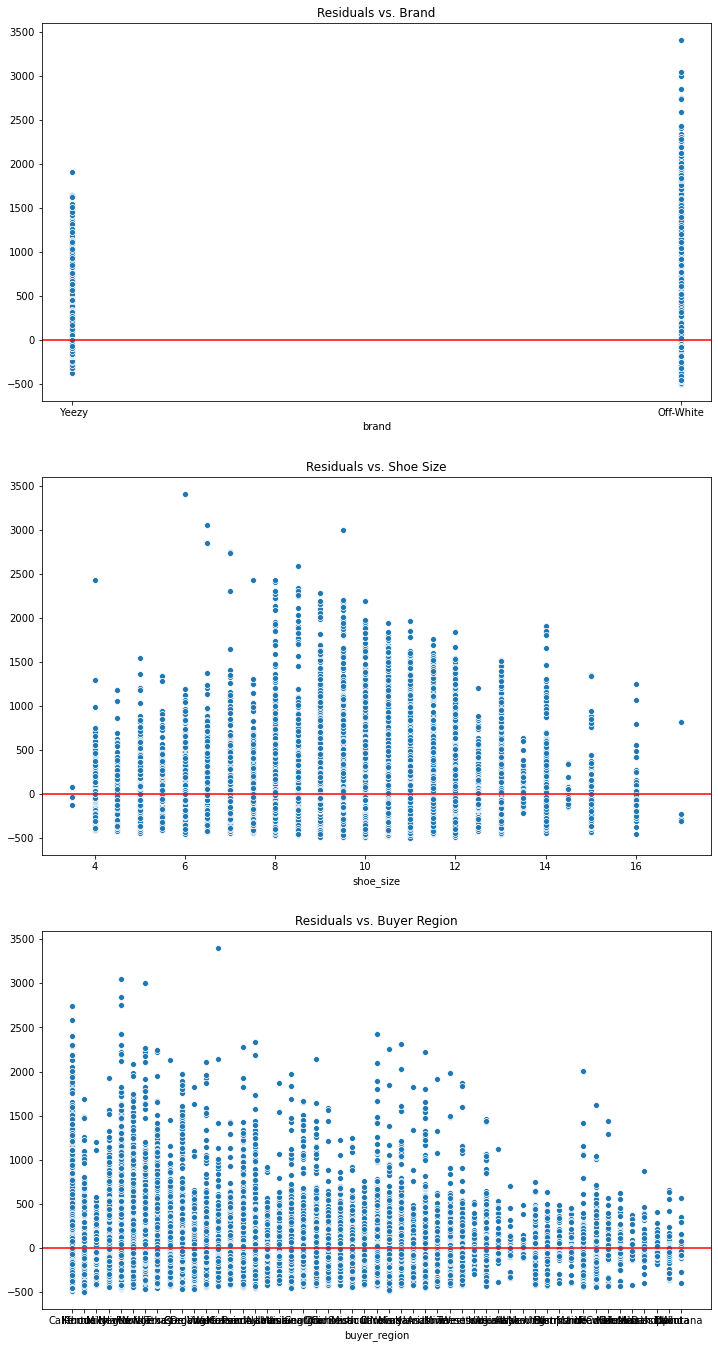

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

residuals = model.resid
plt.figure(figsize=(12,32))

plt.subplot(4,1,1)
sns.scatterplot(stockx_data['brand'], residuals)
plt.axhline(y=0, color='r', linestyle='-')
plt.title('Residuals vs. Brand')

# plt.subplot(5,1,3)
# sns.scatterplot(stockx_data['retail_price'], residuals)
# plt.axhline(y=0, color='r', linestyle='-')
# plt.title('Residuals vs. Retail Price')

plt.subplot(4,1,2)
sns.scatterplot(stockx_data['shoe_size'], residuals)
plt.axhline(y=0, color='r', linestyle='-')
plt.title('Residuals vs. Shoe Size')

plt.subplot(4,1,3)
sns.scatterplot(stockx_data['buyer_region'], residuals)
plt.axhline(y=0, color='r', linestyle='-')
plt.title('Residuals vs. Buyer Region')
plt.show()

Residual plots look seemingly random which is great. This means that there is most likely linearity in our data.

## Test for Constant Variance
We can check for constant variance by plotting the residuals vs the fitted values.

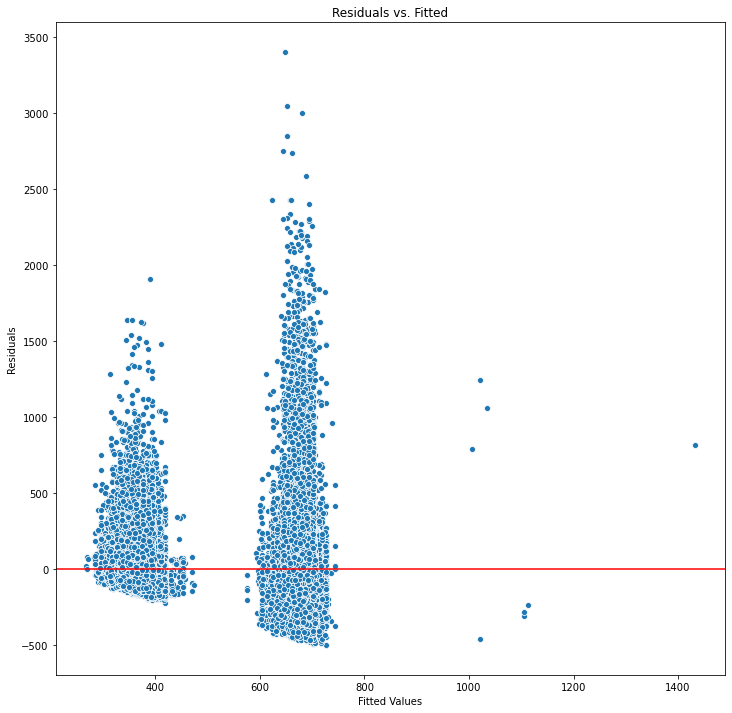

In [32]:
fitted_values = model.fittedvalues

plt.figure(figsize=(12,12))
sns.scatterplot(fitted_values, residuals)
plt.axhline(y=0, color='r', linestyle='-')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Fitted')
plt.show()

Looks like the constant variance assumption might be violated.

We can confirm this using the Breusch–Pagan test here. https://en.wikipedia.org/wiki/Breusch%E2%80%93Pagan_test

In [33]:
import statsmodels.stats.api as sms
import statsmodels.api as sm
from statsmodels.compat import lzip

name = ['Lagrange multiplier statistic', 'p-value',
        'f-value', 'f p-value']
test = sms.het_breuschpagan(model.resid, model.model.exog)
lzip(name, test)

[('Lagrange multiplier statistic', 3006.434873899412),
 ('p-value', 0.0),
 ('f-value', 41.06416554603453),
 ('f p-value', 0.0)]

With a p-value of 0, we reject the null hypothesis that the residuals have constant variance.

## Test for Independence

To test for independence, we use our residuals and obtain the Durbin-Watson statistic. Thankfully, statsmodels already has a function to calculate the statistic. Basically, if the Durbin-Watson statistic is 0, then we do not have autocorrelation - which means that we pass the test for independence. More on the Durbin-Watson statistic can be found here: https://en.wikipedia.org/wiki/Durbin%E2%80%93Watson_statistic.

In [36]:
from statsmodels.stats.stattools import durbin_watson

durbin_watson(model.resid, axis=0)

2.002068422853528

We are slightly above 2, thus indicating that there might be the slightest sign of negative correlation. However, since the amount above 2 is so miniscule, we can comfortably say that the test for independence passes.

## Test for Normality

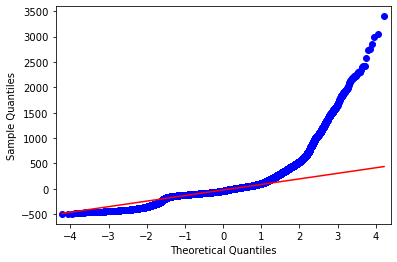

In [18]:
fig = sm.qqplot(model.resid, line='q')
plt.show()

We have some heavy right skewed action going on here. This means that our regression most likely violates the assumption of normality. We could potentially do a log transform on the predicted values to coerce the data into normality but I'm going to skip that for now since I mainly want to get to the model selection part.

What this basically tells us is that this is probably going to be a terrible model. I'm still curious to know which model performs the best in this situation.

Before we do that, let's get our root mean squared error for the model we created to compare with our other models.

In [37]:
from statsmodels.tools.eval_measures import rmse

ols_preds = model.predict(x_test_ols)

rmse(y_test_ols, ols_preds)

211.4170805756408

Now let's grid search to find the best model for lasso, ridge, and even OLS with feature selection and hyper-parameter tuning. The hyperparameter that we are looking for with grid search is $\lambda$, which is how much the coefficients of the model get penalized. Ridge regression minimizes coefficients while Lasso can completely zero them out. When $\lambda$ is 0, that is OLS. More can be found out about Lasso, Ridge, and ElasticNet regression here: https://stats.stackexchange.com/questions/93181/ridge-lasso-and-elastic-net.

In our case, we are going to test  $\lambda$ values between 0.01 and 11, stepping up 0.1 each time. We are going to cross validate the results with 5-fold cross validation and get the $R^2$ value and root mean-squared error of each model that has the optimized $\lambda$ value.

In [45]:
import pandas as pd
import numpy as np
from sklearn import metrics
from sklearn import linear_model
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import OneHotEncoder

# encode categorical variables. We didnt have to encode the original OLS statsmodels model because statsmodels will detect categoricals and encode them automatically.
x_train_onehot = pd.get_dummies(x_train, columns=['brand','sneaker_name','shoe_size', 'buyer_region'])
x_test_onehot = pd.get_dummies(x_test, columns=['brand','sneaker_name','shoe_size', 'buyer_region'])

def find_best_model(models, x_train_onehot, x_test_onehot, y_train, y_test):
    """ takes models dictionary and find best model for each. returns dataframe with """
    all_scores = {}
    for i in models:
        r2_train = metrics.r2_score(y_train, models[i].fit(x_train_onehot, y_train).predict(x_train_onehot))
        train_scores = np.sqrt(metrics.mean_squared_error(y_train, models[i].fit(x_train_onehot, y_train).predict(x_train_onehot)))
        r2_test = metrics.r2_score(y_test, models[i].fit(x_train_onehot,y_train).predict(x_test_onehot))
        test_scores = np.sqrt(metrics.mean_squared_error(y_test, models[i].fit(x_train_onehot, y_train).predict(x_test_onehot)))
        all_scores[i] = [r2_train, train_scores, r2_test, test_scores]
    results = pd.DataFrame(all_scores)
    results.index = ['Training R-squared','Training RMSE', 'Test R-squared', 'Test RMSE']
    return results

alphas = np.arange(0.01, 11, 0.1)
params = {'alpha':alphas}

models_to_test = {'OLS': linear_model.LinearRegression(),
          'Lasso': GridSearchCV(linear_model.Lasso(max_iter=5000), 
                                 param_grid=params, cv=5).fit(x_train_onehot, y_train).best_estimator_,
          'Ridge': GridSearchCV(linear_model.Ridge(max_iter=5000), 
                               param_grid=params, cv=5).fit(x_train_onehot, y_train).best_estimator_,
          'Elastic': GridSearchCV(linear_model.ElasticNet(max_iter=5000), 
                               param_grid=params, cv=5).fit(x_train_onehot, y_train).best_estimator_,}


results = find_best_model(models_to_test, x_train_onehot, x_test_onehot, y_train, y_test)

In [46]:
display(results)

,OLS,Lasso,Ridge,Elastic
Training R-squared,0.829553,0.829477,0.829551,0.733223
Training RMSE,105.855646,105.879434,105.856379,132.432288
Test R-squared,0.823679,0.823617,0.823684,0.729922
Test RMSE,106.773180,106.792192,106.771759,132.146297


Our results are above with Ridge regression coming out on top. OLS and Lasso are close contenders while ElasticNet seems to perform the worst. This makes sense as our data is not very high-dimensional with only 6 columns. Lasso and ElasticNet would perform better if the dataset had more columns. ElasticNet is attempting to zero out predictors that it deems are not statistically significant while also changing the magnitude of certain predictors to attempt to achieve the best model. This is due to the fact that these feature selection methods are attempting to balance the bias and variance of a model. More can be found on the bias and variance trade-off here: https://www.kdnuggets.com/2016/08/bias-variance-tradeoff-overview.html.